# Exploratory Data Analysis

The Questions before starting the EDA are as follows:
1) How many people boarded from different Home Planets ?
2) Distribution of people off-boarding for different locations ?
3) How many the Cabin allotment were done for the people with respect to "Port & "Starboard" ?
4) How many people were in Cryosleep Cabin ?
5) What Age group of people were present in Space Titanic ?
6) What are the total income generated for different Space Services ?
7) What is the total Income generated by people on-boarded from different Home Planets ?
8) Which Cabin side used which service maximum ?
9) What is the different service expnenses done by different Age Group people during the voyage ?
10) What is the total expenses incurred by VIP & Non-VIP people ?
11) Which Cabin allocation was provided maximum to VIPs ?
12) Which is the maximum Home to Destination travel ?

In [231]:
# Importing Liraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
# Defining Data Loading funtion by passwing the path of the data
def data_load(data_path):
    df = pd.read_csv(data_path)

    return df

In [233]:
data = data_load('/home/meghal/Personal/Personal Projects/Space Titanic/Data/cleaned_training_data.csv')
data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8676,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8677,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8678,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8679,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [234]:
data['Cabin'] = data.Cabin.apply(lambda x: x.split('/')[2])
data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8676,Europa,False,P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8677,Earth,True,S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8678,Earth,False,S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8679,Europa,False,S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


# Lets Begin

## Question 1:

### How many people boarded from different Home Planets ?

## Question 2:

### Distribution of people off-boarding for different locations ?

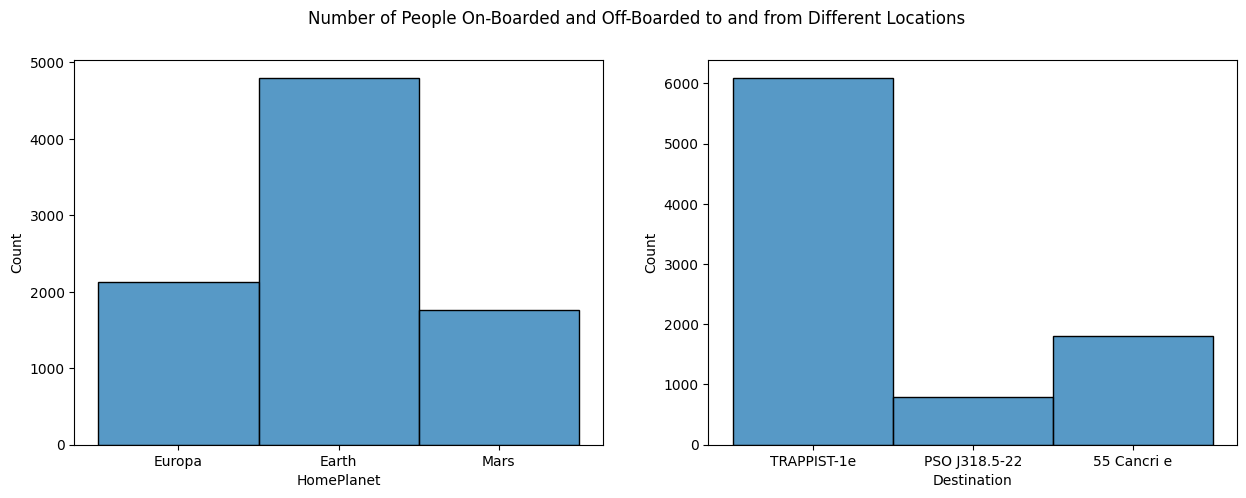

In [235]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Number of People On-Boarded and Off-Boarded to and from Different Locations')
sns.histplot(data, x='HomePlanet', ax=axes[0])
sns.histplot(data, x='Destination', ax=axes[1])
plt.show()
fig.savefig('/home/meghal/Personal/Personal Projects/Space Titanic/Images/Number of People On-Boarded and Off-Boarded to and from Different Locations.jpg')


## Question 3:

### How many the Cabin allotment were done for the people with respect to "Port & "Starboard" ?

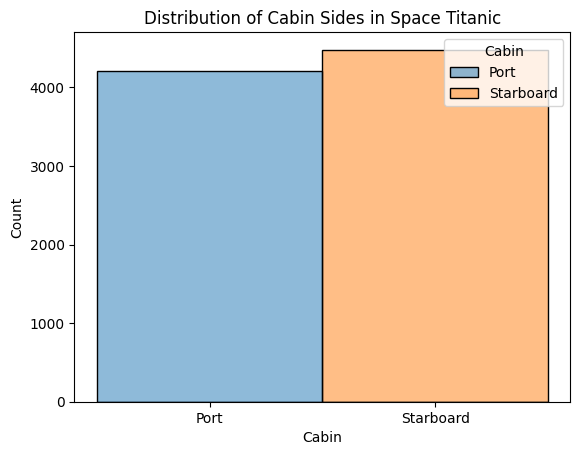

In [236]:
data['Cabin'] = data['Cabin'].map({'P':'Port', 'S':'Starboard'})
sns.histplot(data, x='Cabin', hue='Cabin').set_title('Distribution of Cabin Sides in Space Titanic')
plt.savefig('/home/meghal/Personal/Personal Projects/Space Titanic/Images/Distribution of Cabin Sides in Space Titanic.jpg')

## Queestion 4:

### How many people were in Cryosleep Cabin ?

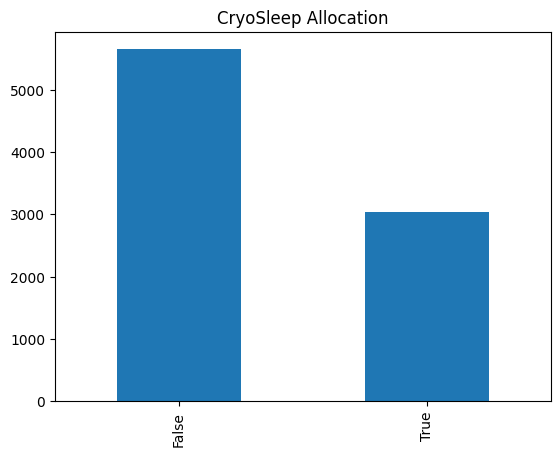

In [237]:
data.CryoSleep.value_counts().plot(kind='bar').set_title('CryoSleep Allocation')
plt.savefig('/home/meghal/Personal/Personal Projects/Space Titanic/Images/CryoSleep Allocation.jpg')

## Question 5:

### What Age group of people were present in Space Titanic ?

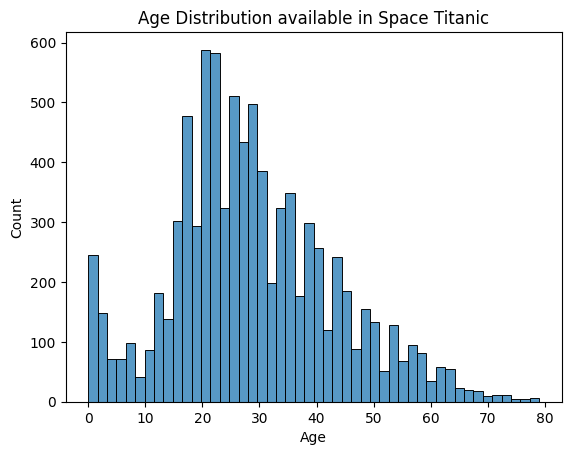

In [238]:
sns.histplot(data, x='Age').set_title('Age Distribution available in Space Titanic')
plt.savefig('/home/meghal/Personal/Personal Projects/Space Titanic/Images/Age Distribution available in Space Titanic.jpg')

## Question 6:

### What are the total income generated for different Space Services ?

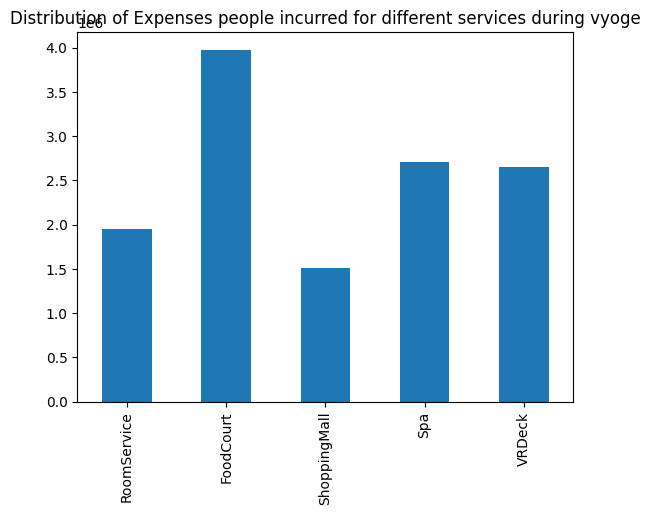

In [239]:
data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].apply(lambda x: x.sum()).plot(kind='bar').set(title='Distribution of Expenses people incurred for different services during vyoge')
plt.savefig('/home/meghal/Personal/Personal Projects/Space Titanic/Images/Distribution of Expenses people incurred during vyoge.jpg')

## Question 7:

### What is the total Income generated by people on-boarded from different Home Planets ?

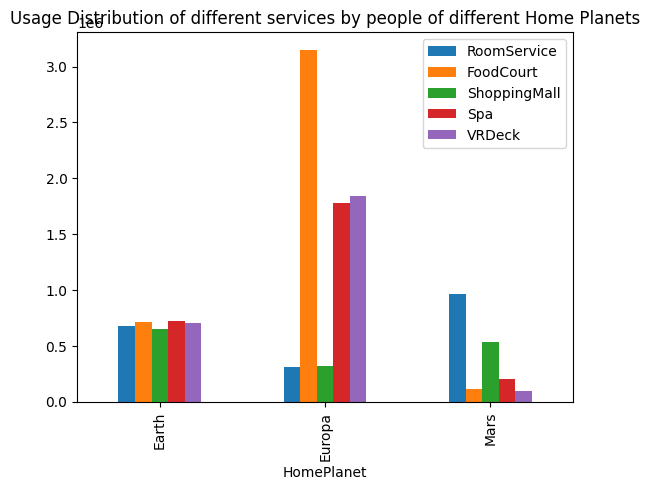

In [240]:
data.groupby('HomePlanet')[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum().plot(kind='bar').set_title('Usage Distribution of different services by people of different Home Planets')
plt.savefig('/home/meghal/Personal/Personal Projects/Space Titanic/Images/Usage Distribution of different services by people of different Home Planets.jpg')

## Question 8:

### Which Cabin side used which service maximum ?

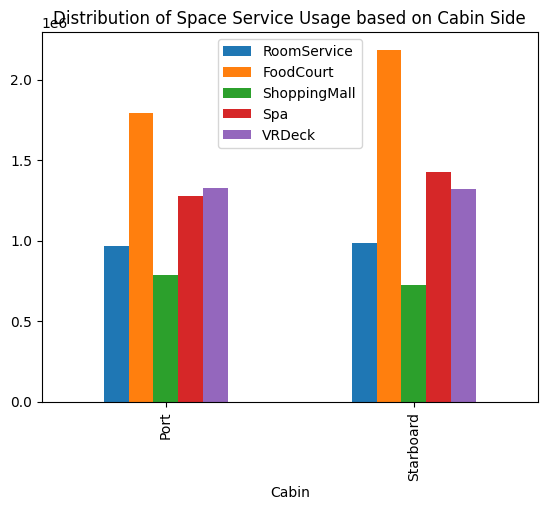

In [241]:
data.groupby('Cabin')[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum().plot(kind='bar').set_title('Distribution of Space Service Usage based on Cabin Side')
plt.savefig('/home/meghal/Personal/Personal Projects/Space Titanic/Images/Distribution of Space Service Usage based on Cabin Side.jpg')

## Question 9:

### What is the different service expnenses done by different Age Group people during the voyage ?

/tmp/ipykernel_10217/967400245.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_service['AgeBins'] = pd.cut(age_service.Age, age_bins)


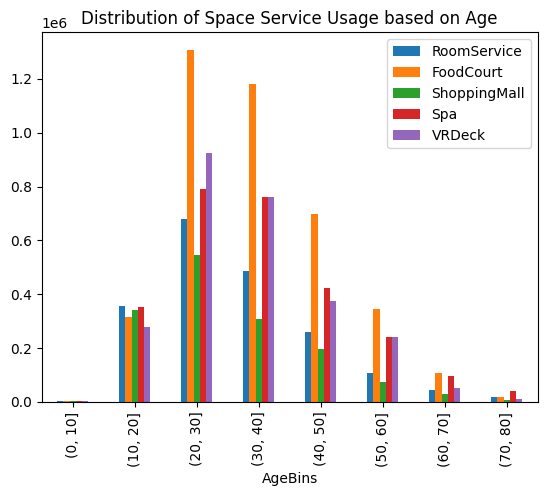

In [242]:
age_service = data[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_service['AgeBins'] = pd.cut(age_service.Age, age_bins)
age_service = age_service.drop('Age', axis='columns')
age_service.groupby('AgeBins')[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum().plot(kind='bar').set_title('Distribution of Space Service Usage based on Age')
plt.savefig('/home/meghal/Personal/Personal Projects/Space Titanic/Images/Distribution of Space Service Usage based on Age.jpg')

## Question 10:

### What is the total expenses incurred by VIP & Non-VIP people ?

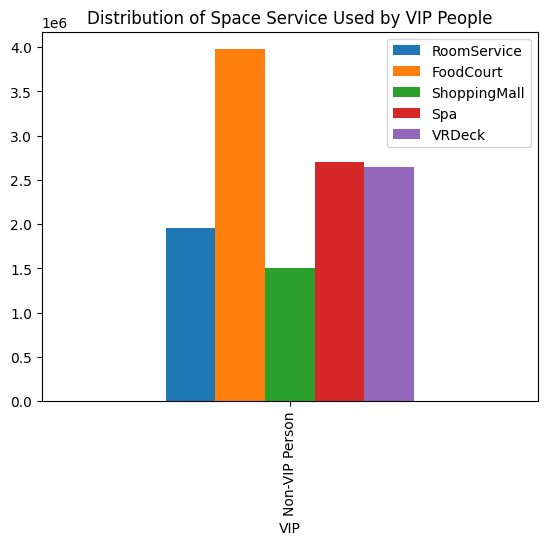

In [245]:
data['VIP'] = np.where(data.VIP == 'True', 'VIP Person', 'Non-VIP Person')
data.groupby('VIP')[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum().plot(kind='bar').set_title('Distribution of Space Service Used by VIP People')
plt.savefig('/home/meghal/Personal/Personal Projects/Space Titanic/Images/Distribution of Space Service Used by VIP People.jpg')

In [246]:
data.VIP.value_counts()

Non-VIP Person    8681
Name: VIP, dtype: int64